In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

import sys
sys.path.insert(0, '../utils')
from dataPiping import *

import numpy as np
import pandas as pd
from math import exp, fabs, sqrt, log, pi
import datetime

In [3]:
import seaborn as sns

In [4]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.callbacks import Callback, LambdaCallback, TensorBoard, ReduceLROnPlateau, EarlyStopping
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

Using TensorFlow backend.


In [5]:
from sklearn.metrics import mean_squared_error

In [6]:
seed = 42
np.random.seed(seed)

In [7]:
X, y = readAggrData()
X_train, X_test, y_train, y_test = splitAndNormaliseAggr(X,y)

## 2 hidden layers

In [15]:
def model():
    model = Sequential()
    model.add(Dense(X.shape[1], input_dim=X.shape[1], kernel_initializer='normal', activation='relu'))
    model.add(Dense(6, kernel_initializer='normal', activation='relu'))
    model.add(Dense(1, kernel_initializer='normal')) # no activation/linear activation
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model

In [16]:
nn = model()

In [28]:
hist = nn.fit(
    X_train, y_train,
    batch_size=100, nb_epoch=1000, 
    verbose=0
)

In [33]:
str(datetime.timedelta(seconds=sqrt(mean_squared_error(y_test, nn.predict(X_test)))))

'35 days, 16:22:30.998900'

In [32]:
str(datetime.timedelta(seconds=sqrt(mean_squared_error(y_train, nn.predict(X_train)))))

'35 days, 7:42:42.976919'

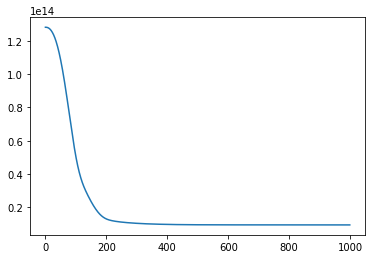

In [30]:
plt.plot(hist.history['loss'])

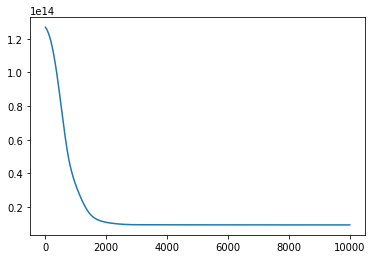

In [18]:
plt.plot(hist.history['loss'])

In [31]:
rmse = sqrt(mean_squared_error(y_test, nn.predict(X_test)))
str(datetime.timedelta(seconds=rmse))

'35 days, 16:22:30.998900'

In [34]:
rmse

3082950.998900366

## Use dropout

In [8]:
def model_dropout():
    model = Sequential()
    model.add(Dense(X.shape[1], input_dim=X.shape[1], kernel_initializer='normal', activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(6, kernel_initializer='normal', activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(1, kernel_initializer='normal')) # no activation/linear activation
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model

In [8]:
# reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.001)

def fit_model(model, log_dir='nn', batch_size=1000, epochs=10000, log_every=1000):
    hist = model.fit(
    X_train, y_train, validation_split=.2,
    batch_size=batch_size, epochs=epochs, verbose=0
        , callbacks=[
            TensorBoard(log_dir='../../logs/{}'.format(log_dir), histogram_freq=100)
            , EarlyStopping(monitor='val_loss', min_delta=0, patience=100, verbose=1, mode='auto')
        ]
    )
    return hist

In [10]:
model = model_dropout()

In [11]:
fit_model(model)

INFO:tensorflow:Summary name dense_1/kernel:0 is illegal; using dense_1/kernel_0 instead.
INFO:tensorflow:Summary name dense_1/bias:0 is illegal; using dense_1/bias_0 instead.
INFO:tensorflow:Summary name dense_2/kernel:0 is illegal; using dense_2/kernel_0 instead.
INFO:tensorflow:Summary name dense_2/bias:0 is illegal; using dense_2/bias_0 instead.
INFO:tensorflow:Summary name dense_3/kernel:0 is illegal; using dense_3/kernel_0 instead.
INFO:tensorflow:Summary name dense_3/bias:0 is illegal; using dense_3/bias_0 instead.
Epoch 04330: early stopping


In [12]:
y_pred = model.predict(X_test).reshape((-1,))

In [14]:
rmse = sqrt(mean_squared_error(y_test, y_pred))
str(datetime.timedelta(seconds=rmse))

'36 days, 21:02:54.888304'

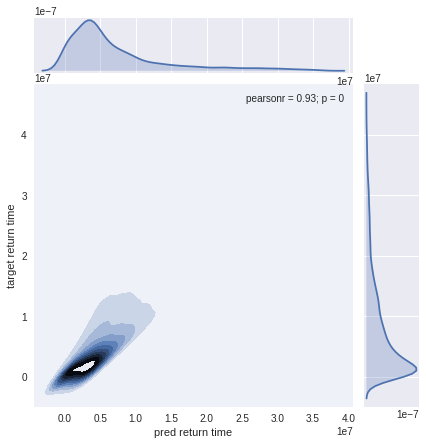

In [15]:
g = sns.jointplot(y_pred, y_test, kind="kde")
g.set_axis_labels("pred return time", "target return time")

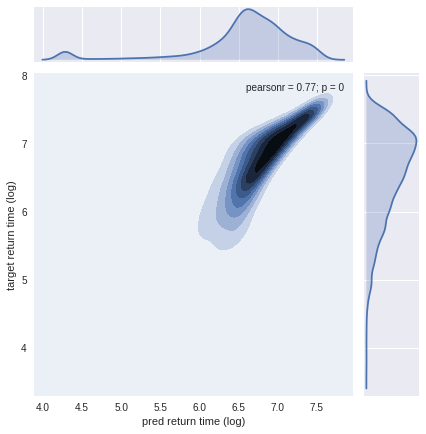

In [16]:
grid = sns.jointplot(np.log10(y_pred), np.log10(y_test), kind="kde")
grid.set_axis_labels("pred return time (log)", "target return time (log)")

## No dropout

In [9]:
def no_dropout_model():
    m = Sequential()
    m.add(Dense(X.shape[1], input_dim=X.shape[1], kernel_initializer='normal', activation='relu'))
    m.add(Dense(6, kernel_initializer='normal', activation='relu'))
    m.add(Dense(1, kernel_initializer='normal')) # no activation/linear activation
    m.compile(loss='mean_squared_error', optimizer='adam')
    return m

In [10]:
no_dr_model = no_dropout_model()

In [11]:
fit_model(no_dr_model, log_dir='no_dropout')

INFO:tensorflow:Summary name dense_1/kernel:0 is illegal; using dense_1/kernel_0 instead.
INFO:tensorflow:Summary name dense_1/bias:0 is illegal; using dense_1/bias_0 instead.
INFO:tensorflow:Summary name dense_2/kernel:0 is illegal; using dense_2/kernel_0 instead.
INFO:tensorflow:Summary name dense_2/bias:0 is illegal; using dense_2/bias_0 instead.
INFO:tensorflow:Summary name dense_3/kernel:0 is illegal; using dense_3/kernel_0 instead.
INFO:tensorflow:Summary name dense_3/bias:0 is illegal; using dense_3/bias_0 instead.


In [13]:
y_pred_nd = no_dr_model.predict(X_test).reshape((-1,))

In [15]:
rmse_nd = sqrt(mean_squared_error(y_test, y_pred_nd))
str(datetime.timedelta(seconds=rmse_nd))

'35 days, 17:11:15.986210'

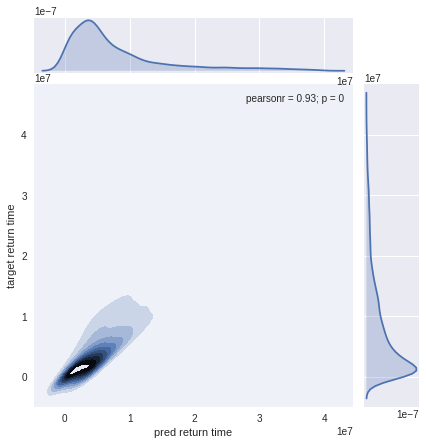

In [16]:
g = sns.jointplot(y_pred_nd, y_test, kind="kde")
g.set_axis_labels("pred return time", "target return time")

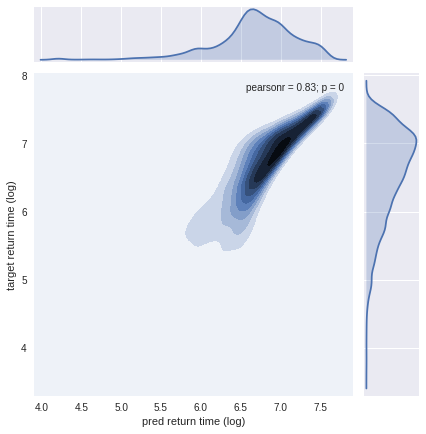

In [17]:
grid = sns.jointplot(np.log10(y_pred_nd), np.log10(y_test), kind="kde")
grid.set_axis_labels("pred return time (log)", "target return time (log)")